[*********************100%***********************]  1 of 1 completed


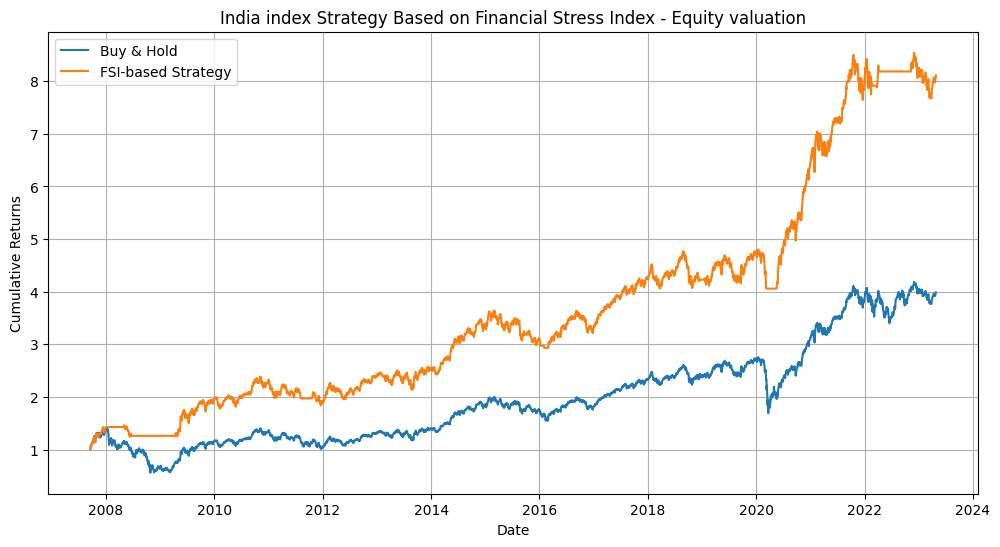

Annualized Returns:
0.095404
0.147903

Annualized Volatility:
0.218597
0.158969

Sharpe Ratios:
0.436437
0.930389

Maximum Drawdowns:
returns            -0.598559
strategy_returns   -0.228503
dtype: float64
Optimal FSI Threshold: 0.50
Optimal Sharpe Ratio: 0.95


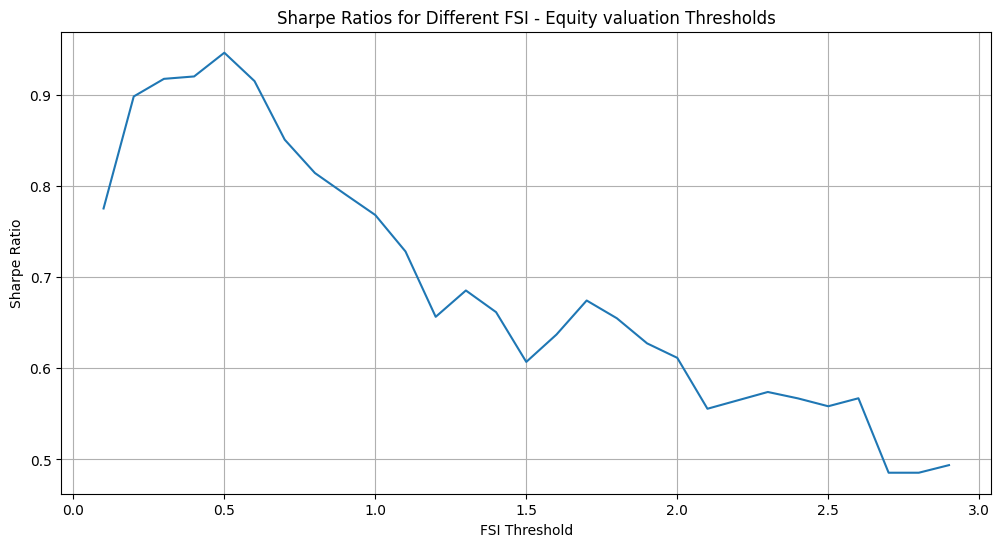

In [127]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
india_etf = '^NSEI'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(india_etf, start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Define the strategy
fsi_threshold = 0.5 # You can replace this with the optimal threshold value you found earlier
strategy_data['signal'] = np.where((strategy_data['Equity valuation'].shift(1) < fsi_threshold), 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']

# Calculate cumulative returns
cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('India index Strategy Based on Financial Stress Index - Equity valuation')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()

# Compute performance metrics
trading_days_per_year = 252
annualized_returns = cumulative_returns.iloc[-1] ** (trading_days_per_year / len(cumulative_returns)) - 1
annualized_volatility = strategy_data[['returns', 'strategy_returns']].std() * np.sqrt(trading_days_per_year)
sharpe_ratios = annualized_returns / annualized_volatility

# Calculate maximum drawdown
rolling_max = cumulative_returns.cummax()
drawdowns = (cumulative_returns - rolling_max) / rolling_max
max_drawdowns = drawdowns.min()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)


import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI - Equity valuation Thresholds")
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed


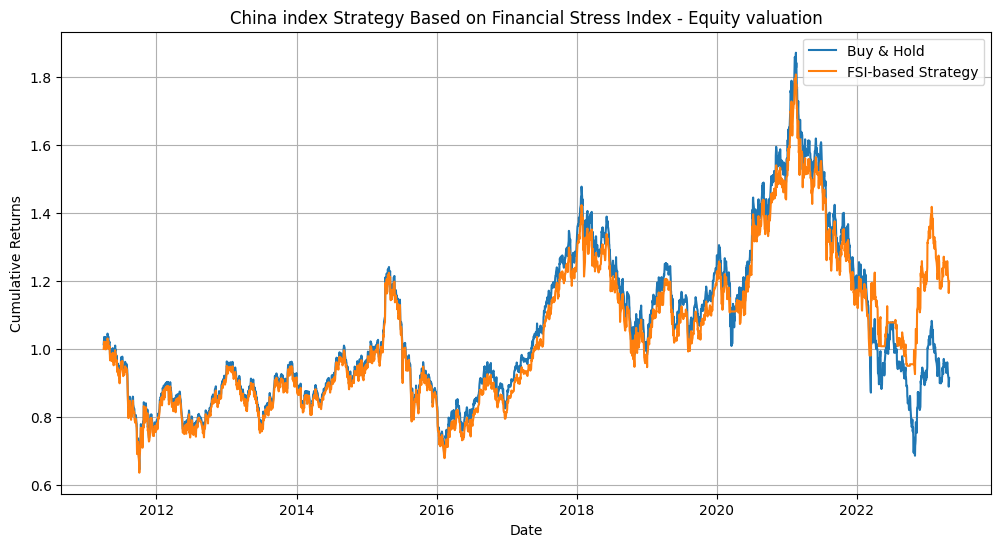

Annualized Returns:
-0.007373
 0.015123

Annualized Volatility:
0.264698
0.251137

Sharpe Ratios:
-0.027856
 0.060218

Maximum Drawdowns:
returns            -0.633913
strategy_returns   -0.488028
dtype: float64
Optimal FSI Threshold: 1.00
Optimal Sharpe Ratio: 0.18


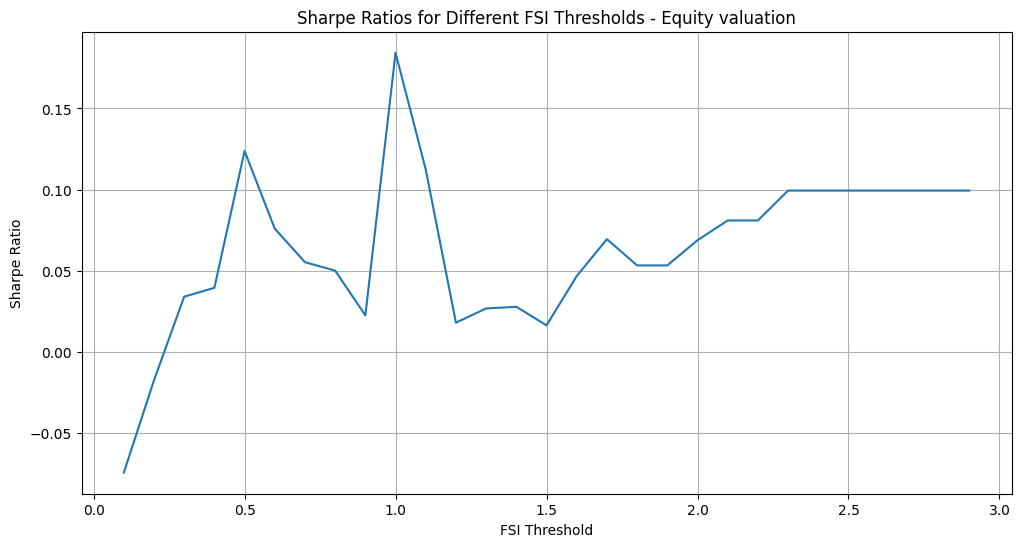

In [121]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
china_index = '^HSI'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(china_etf, start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Define the strategy
fsi_threshold = 1  # You can replace this with the optimal threshold value you found earlier
strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < fsi_threshold, 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']

# Calculate cumulative returns
cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('China index Strategy Based on Financial Stress Index - Equity valuation')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()


# Compute performance metrics
trading_days_per_year = 252
annualized_returns = cumulative_returns.iloc[-1] ** (trading_days_per_year / len(cumulative_returns)) - 1
annualized_volatility = strategy_data[['returns', 'strategy_returns']].std() * np.sqrt(trading_days_per_year)
sharpe_ratios = annualized_returns / annualized_volatility

# Calculate maximum drawdown
rolling_max = cumulative_returns.cummax()
drawdowns = (cumulative_returns - rolling_max) / rolling_max
max_drawdowns = drawdowns.min()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)


import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI Thresholds - Equity valuation")
plt.grid()
plt.show()



Optimal FSI Threshold: 2.80
Optimal Sharpe Ratio: 0.59


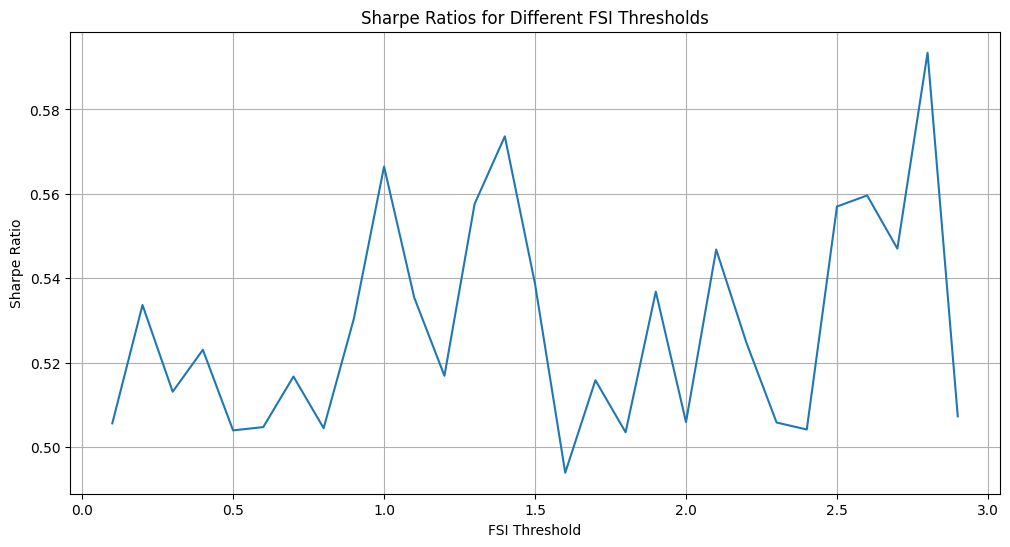

In [72]:
import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['OFR FSI'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI Thresholds")
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed


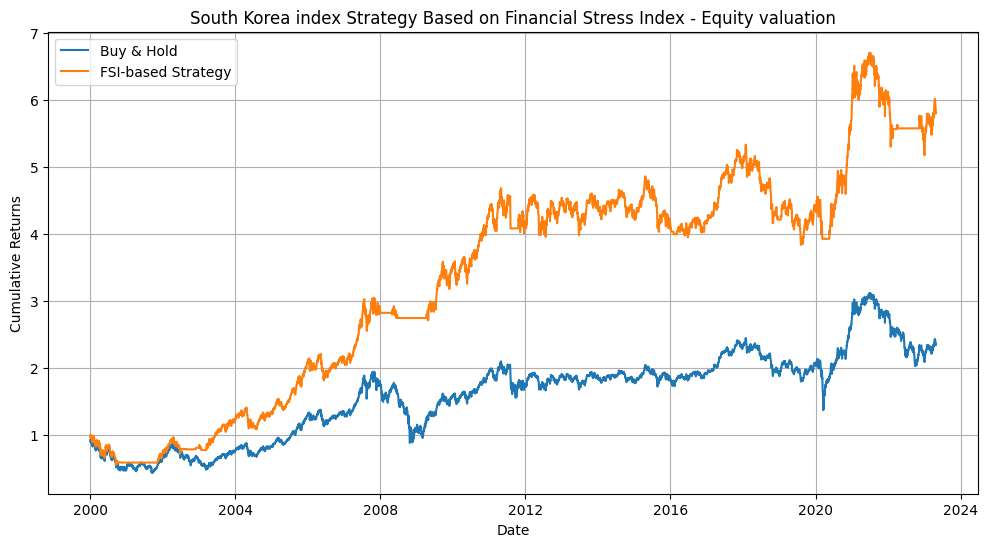

Annualized Returns:
0.095404
0.147903

Annualized Volatility:
0.218597
0.158969

Sharpe Ratios:
0.436437
0.930389

Maximum Drawdowns:
returns            -0.598559
strategy_returns   -0.228503
dtype: float64


In [81]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
india_etf = '^KS11'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(india_etf, start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Define the strategy
fsi_threshold = 0.5  # You can replace this with the optimal threshold value you found earlier
strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < fsi_threshold, 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']

# Calculate cumulative returns
cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('South Korea index Strategy Based on Financial Stress Index - Equity valuation')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)

Optimal FSI Threshold: 0.30
Optimal Sharpe Ratio: 0.58


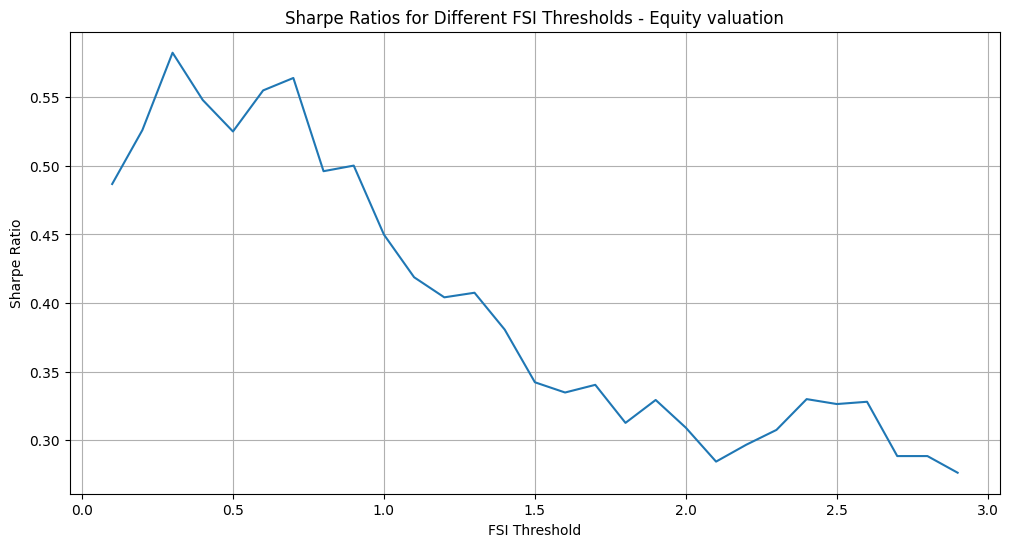

In [64]:
import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI Thresholds - Equity valuation")
plt.grid()
plt.show()


Optimal FSI Threshold: 1.60
Optimal Sharpe Ratio: 0.65


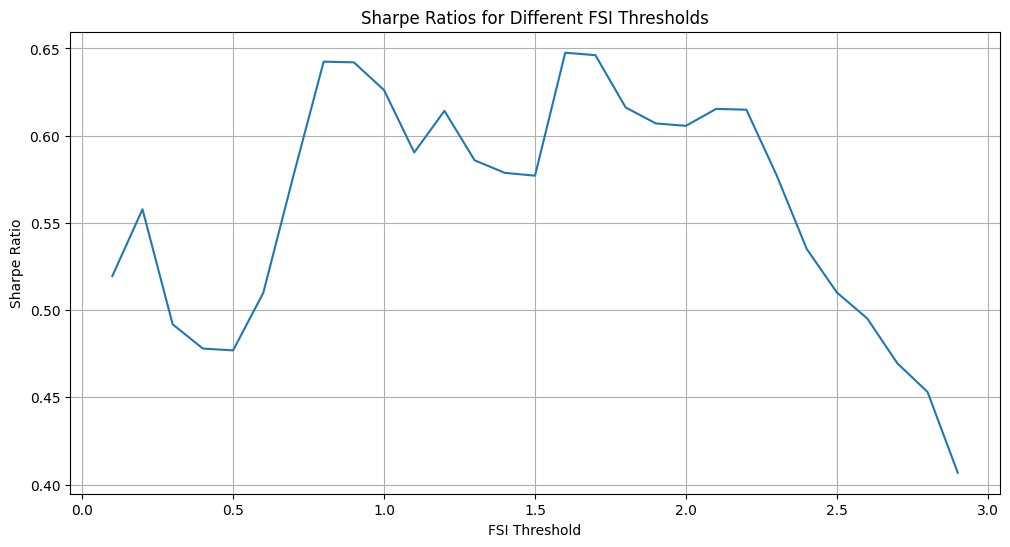

In [75]:
import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['OFR FSI'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI Thresholds")
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed


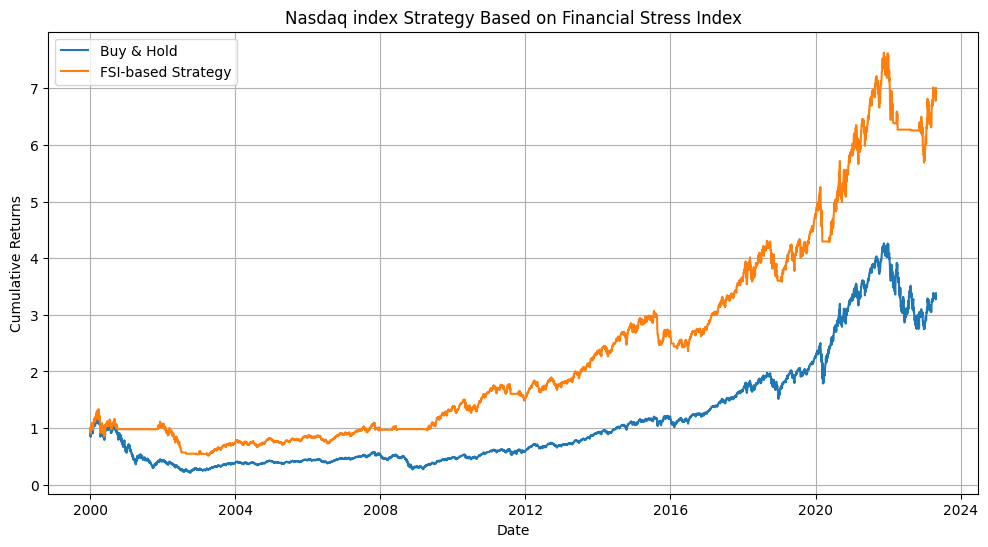

Annualized Returns:
0.095404
0.147903

Annualized Volatility:
0.218597
0.158969

Sharpe Ratios:
0.436437
0.930389

Maximum Drawdowns:
returns            -0.598559
strategy_returns   -0.228503
dtype: float64


In [83]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
india_etf = 'QQQ'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(india_etf, start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Define the strategy
fsi_threshold = 0.5 # You can replace this with the optimal threshold value you found earlier
strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < fsi_threshold, 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']

# Calculate cumulative returns
cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('Nasdaq index Strategy Based on Financial Stress Index')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)

Optimal FSI Threshold: 0.50
Optimal Sharpe Ratio: 0.53


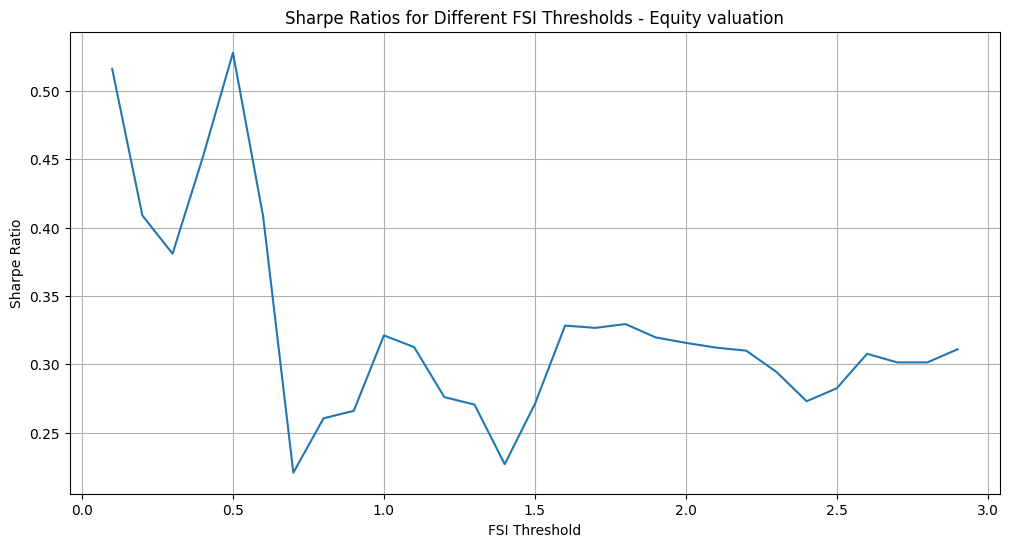

In [66]:
import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI Thresholds - Equity valuation")
plt.grid()
plt.show()


Optimal FSI Threshold: 0.20
Optimal Sharpe Ratio: 0.36


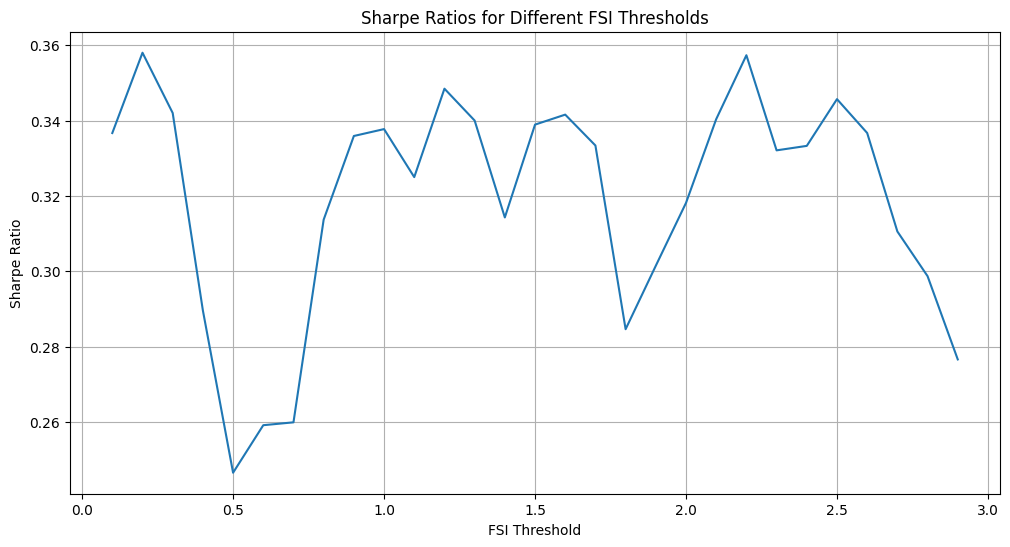

In [101]:
import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['OFR FSI'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI Thresholds")
plt.grid()
plt.show()



[*********************100%***********************]  1 of 1 completed


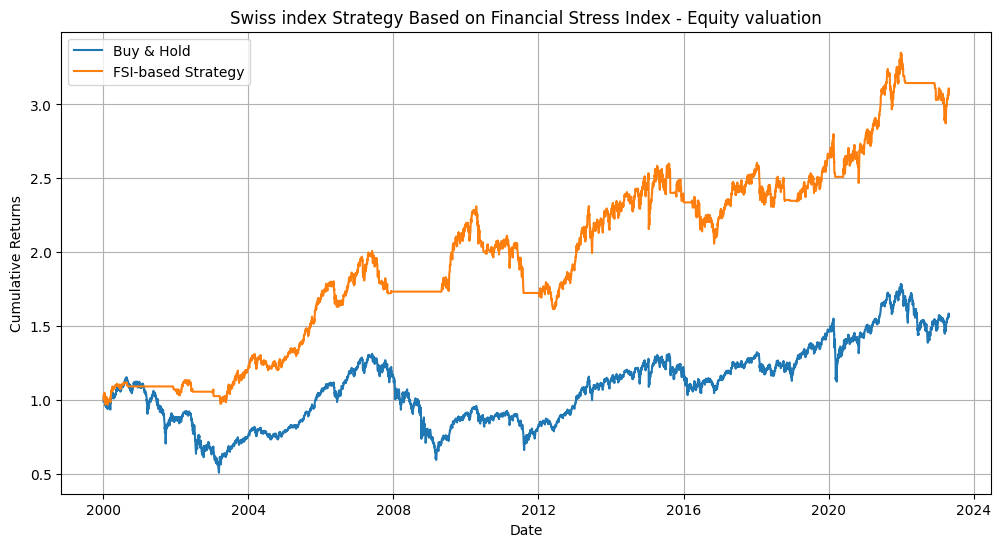

Annualized Returns:
0.019408
0.049419

Annualized Volatility:
0.180314
0.110974

Sharpe Ratios:
0.107637
0.445324

Maximum Drawdowns:
returns            -0.561251
strategy_returns   -0.301269
dtype: float64


In [99]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
india_etf = '^SSMI'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(india_etf, start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Define the strategy
fsi_threshold = 0.2 # You can replace this with the optimal threshold value you found earlier
strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < fsi_threshold, 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']

# Calculate cumulative returns
cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('Swiss index Strategy Based on Financial Stress Index - Equity valuation')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()

# Compute performance metrics
trading_days_per_year = 252
annualized_returns = cumulative_returns.iloc[-1] ** (trading_days_per_year / len(cumulative_returns)) - 1
annualized_volatility = strategy_data[['returns', 'strategy_returns']].std() * np.sqrt(trading_days_per_year)
sharpe_ratios = annualized_returns / annualized_volatility

# Calculate maximum drawdown
rolling_max = cumulative_returns.cummax()
drawdowns = (cumulative_returns - rolling_max) / rolling_max
max_drawdowns = drawdowns.min()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)


Optimal FSI Threshold: 0.20
Optimal Sharpe Ratio: 0.49


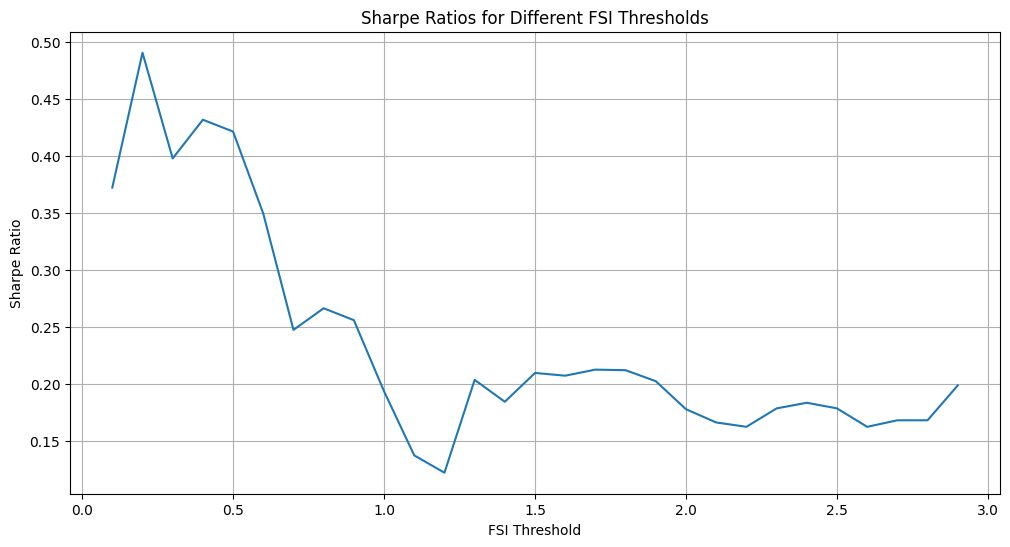

In [102]:
import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI Thresholds")
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed


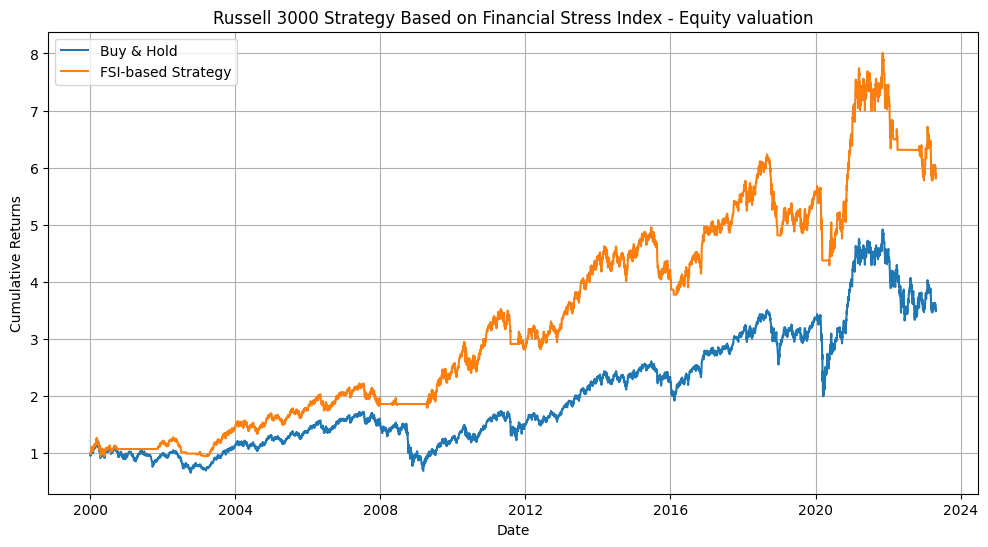

Annualized Returns:
0.055650
0.079067

Annualized Volatility:
0.247170
0.178864

Sharpe Ratios:
0.225148
0.442048

Maximum Drawdowns:
returns            -0.598888
strategy_returns   -0.311999
dtype: float64
Optimal FSI Threshold: 0.50
Optimal Sharpe Ratio: 0.52


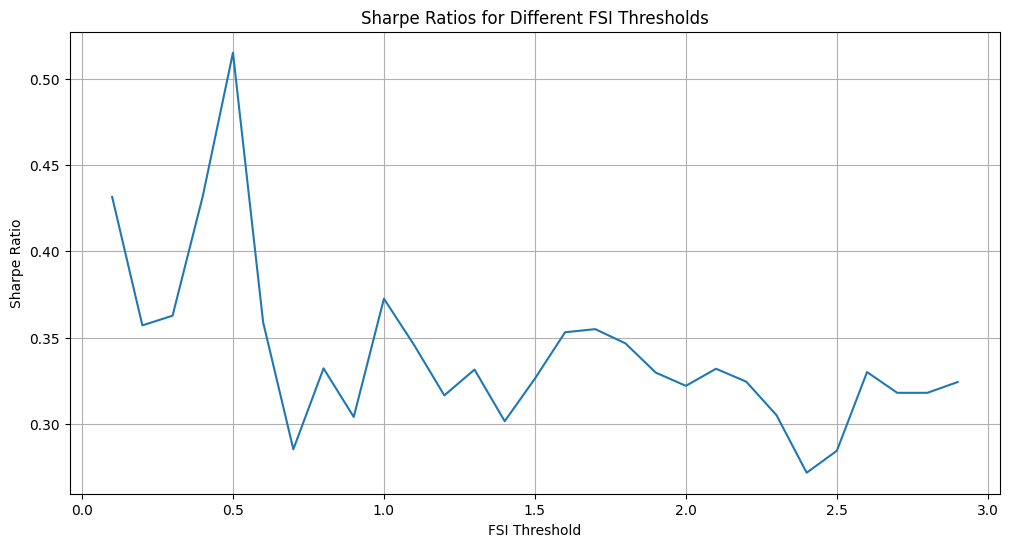

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
india_etf = '^RUT'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(india_etf, start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Define the strategy
fsi_threshold = 0.5 # You can replace this with the optimal threshold value you found earlier
strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < fsi_threshold, 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']

# Calculate cumulative returns
cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('Russell 3000 Strategy Based on Financial Stress Index - Equity valuation')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()

# Compute performance metrics
trading_days_per_year = 252
annualized_returns = cumulative_returns.iloc[-1] ** (trading_days_per_year / len(cumulative_returns)) - 1
annualized_volatility = strategy_data[['returns', 'strategy_returns']].std() * np.sqrt(trading_days_per_year)
sharpe_ratios = annualized_returns / annualized_volatility

# Calculate maximum drawdown
rolling_max = cumulative_returns.cummax()
drawdowns = (cumulative_returns - rolling_max) / rolling_max
max_drawdowns = drawdowns.min()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)


import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI Thresholds")
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed


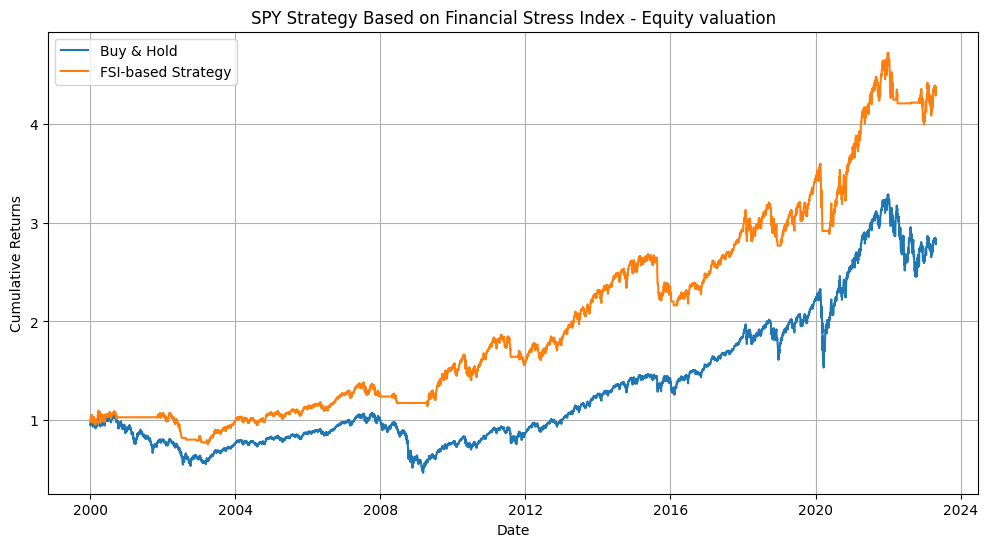

Annualized Returns:
0.045793
0.065407

Annualized Volatility:
0.198457
0.133221

Sharpe Ratios:
0.230744
0.490965

Maximum Drawdowns:
returns            -0.564737
strategy_returns   -0.312833
dtype: float64
Optimal FSI Threshold: 0.50
Optimal Sharpe Ratio: 0.54


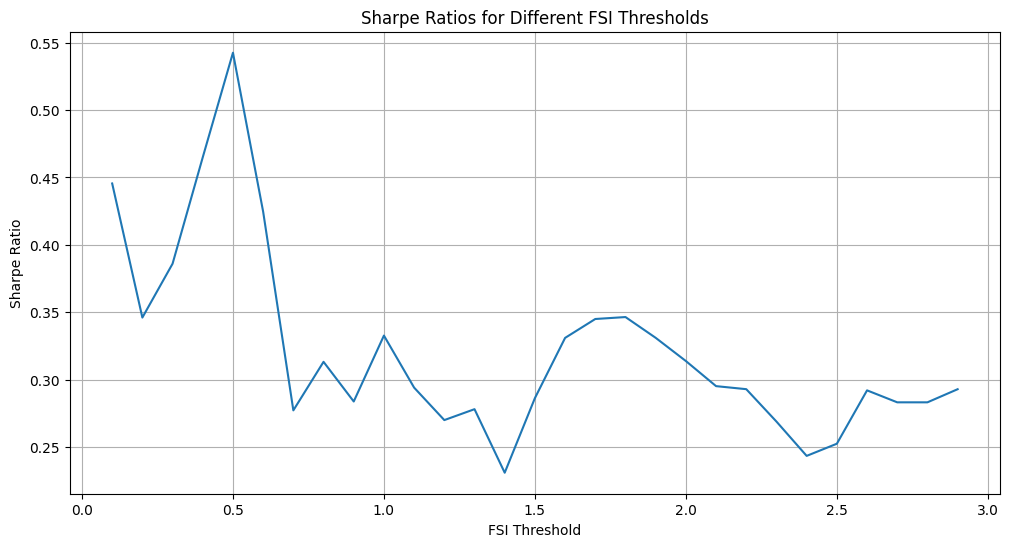

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load Financial Stress Index data for regions from a local CSV file
fsi_regions_data = pd.read_csv('fsi_regions.csv', parse_dates=['Date'], index_col='Date')

# Define India ETF ticker and start and end dates
india_etf = 'SPY'
start_date = fsi_regions_data.index.min()
end_date = fsi_regions_data.index.max()

# Download India ETF data from Yahoo Finance
prices = yf.download(india_etf, start=start_date, end=end_date)['Close']

# Calculate daily returns
daily_returns = prices.pct_change()

# Resample FSI data to daily
fsi_daily = fsi_regions_data.resample('D').interpolate()

# Align both datasets
aligned_data = daily_returns.to_frame('returns').join(fsi_daily).dropna()

# Create a strategy DataFrame
strategy_data = aligned_data.copy()

# Define the strategy
fsi_threshold = 0.5 # You can replace this with the optimal threshold value you found earlier
strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < fsi_threshold, 1, 0)
strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']

# Calculate cumulative returns
cumulative_returns = (1 + strategy_data[['returns', 'strategy_returns']]).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.title('SPY Strategy Based on Financial Stress Index - Equity valuation')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['Buy & Hold', 'FSI-based Strategy'])
plt.grid()
plt.show()

# Compute performance metrics
trading_days_per_year = 252
annualized_returns = cumulative_returns.iloc[-1] ** (trading_days_per_year / len(cumulative_returns)) - 1
annualized_volatility = strategy_data[['returns', 'strategy_returns']].std() * np.sqrt(trading_days_per_year)
sharpe_ratios = annualized_returns / annualized_volatility

# Calculate maximum drawdown
rolling_max = cumulative_returns.cummax()
drawdowns = (cumulative_returns - rolling_max) / rolling_max
max_drawdowns = drawdowns.min()

# Print performance metrics
print("Annualized Returns:")
print(annualized_returns.to_string(index=False))
print("\nAnnualized Volatility:")
print(annualized_volatility.to_string(index=False))
print("\nSharpe Ratios:")
print(sharpe_ratios.to_string(index=False))
print("\nMaximum Drawdowns:")
print(max_drawdowns)


import empyrical as ep

fsi_thresholds = np.arange(0.1, 3, 0.1)
sharpe_ratios = []

for threshold in fsi_thresholds:
    strategy_data['signal'] = np.where(strategy_data['Equity valuation'].shift(1) < threshold, 1, 0)
    strategy_data['strategy_returns'] = strategy_data['signal'] * strategy_data['returns']
    
    # Calculate the Sharpe ratio
    sharpe_ratio = ep.sharpe_ratio(strategy_data['strategy_returns'].fillna(0))
    sharpe_ratios.append(sharpe_ratio)

# Find the optimal FSI threshold
optimal_index = np.argmax(sharpe_ratios)
optimal_fsi_threshold = fsi_thresholds[optimal_index]
optimal_sharpe_ratio = sharpe_ratios[optimal_index]

print(f"Optimal FSI Threshold: {optimal_fsi_threshold:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.2f}")

# Plot the Sharpe ratios for different FSI thresholds
plt.figure(figsize=(12, 6))
plt.plot(fsi_thresholds, sharpe_ratios)
plt.xlabel("FSI Threshold")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios for Different FSI Thresholds")
plt.grid()
plt.show()